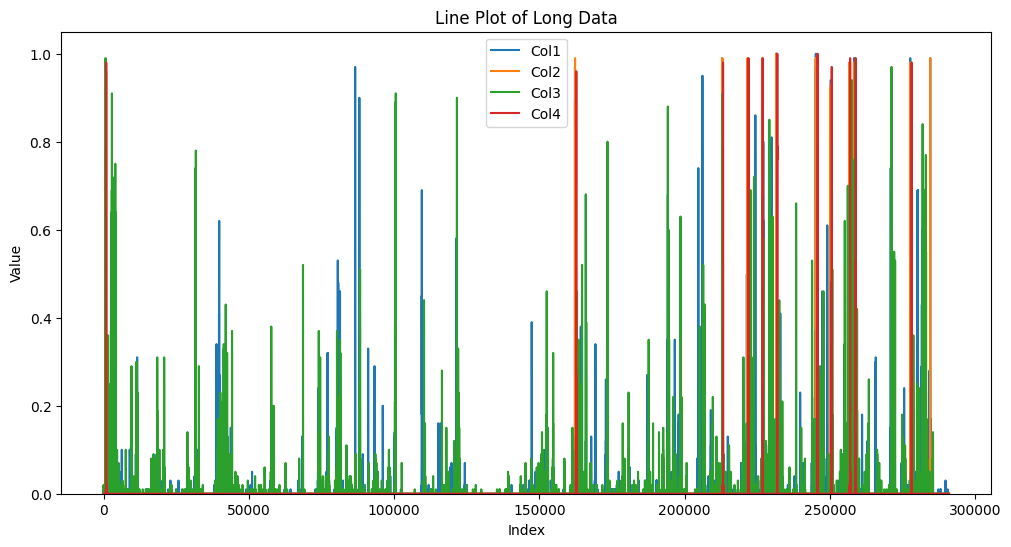

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data (assuming tab-separated, no header)
df = pd.read_csv("data.csv", sep=",", header=None)
df.columns = ["Index", "Col1", "Col2", "Col3", "Col4"]

# Line plot
plt.figure(figsize=(12,6))
for col in df.columns[1:]:
    plt.plot(df["Index"], df[col], label=col)

plt.ylim(bottom=0)  # since you have mostly positive values
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Plot of Long Data")
plt.legend()
plt.show()

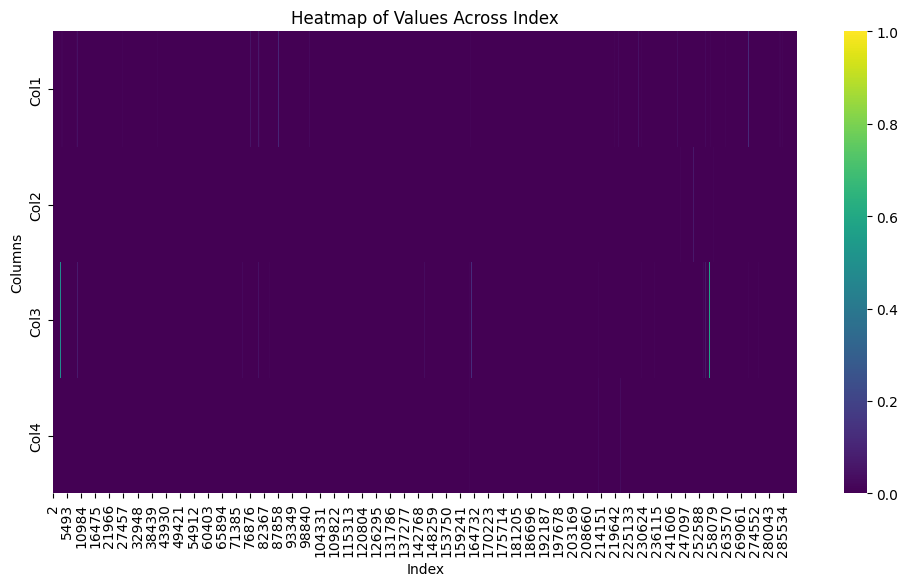

In [4]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(df.set_index("Index").T, cmap="viridis", cbar=True)
plt.title("Heatmap of Values Across Index")
plt.xlabel("Index")
plt.ylabel("Columns")
plt.show()


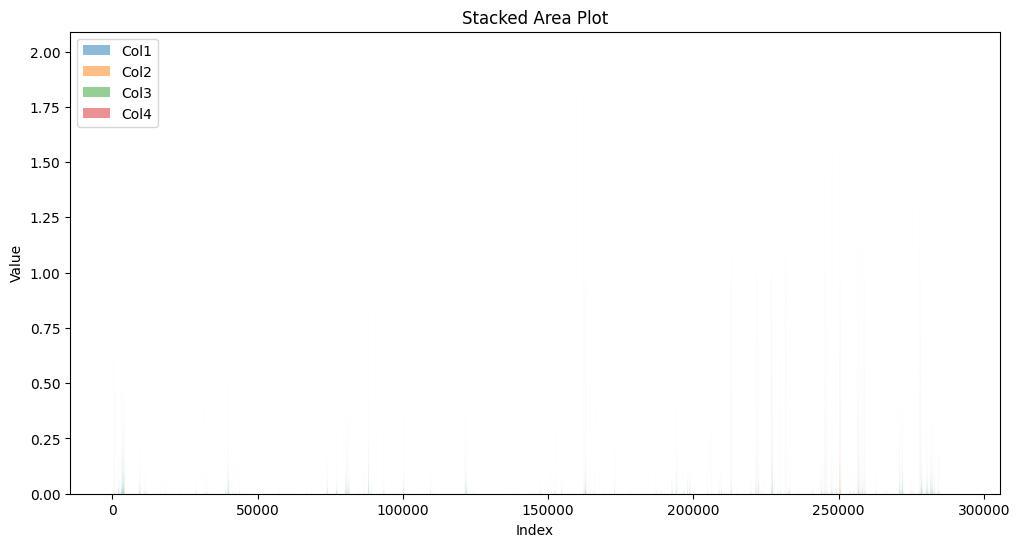

In [12]:
plt.figure(figsize=(12,6))
plt.stackplot(df["Index"], df["Col1"], df["Col2"], df["Col3"], df["Col4"],
              labels=df.columns[1:], alpha=0.9)
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Stacked Area Plot")
plt.legend(loc="upper left")
plt.show()


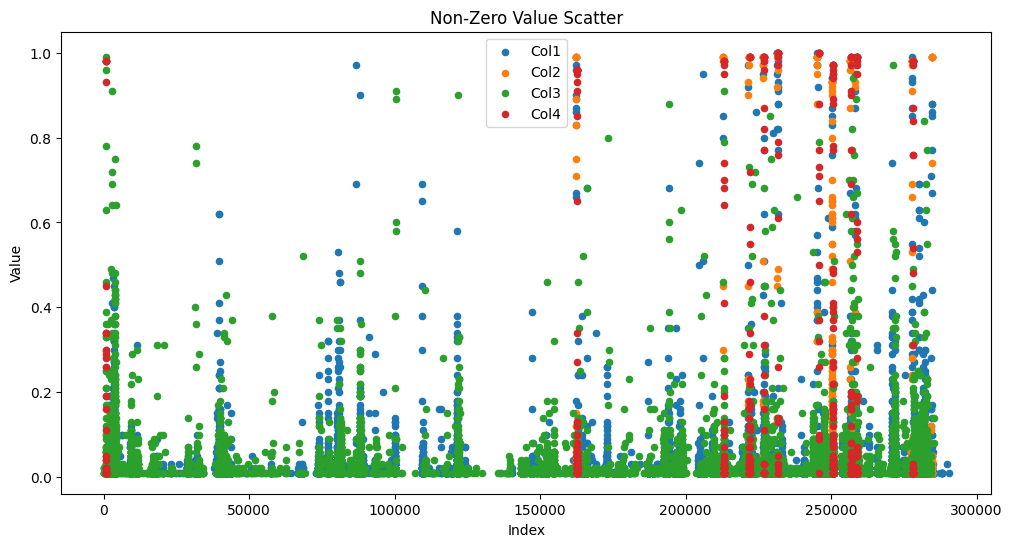

In [6]:
plt.figure(figsize=(12,6))
for col in df.columns[1:]:
    nz = df[df[col] > 0]
    plt.scatter(nz["Index"], nz[col], label=col, s=20)

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Non-Zero Value Scatter")
plt.legend()
plt.show()


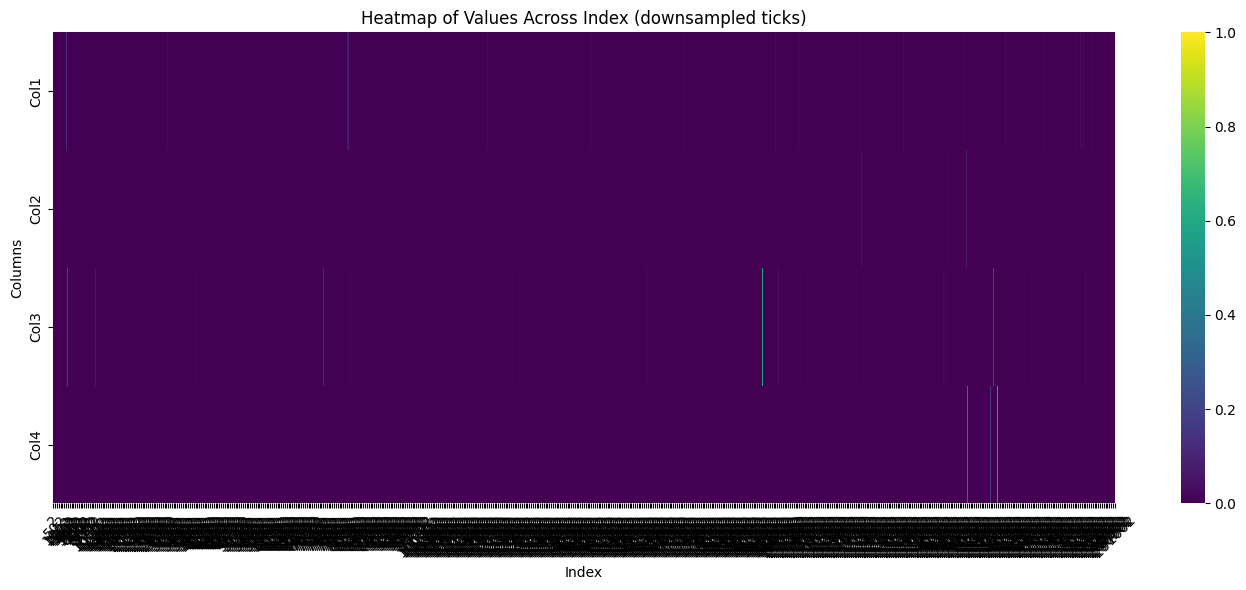

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(df.set_index("Index").T, cmap="viridis", cbar=True)

# Show only every Nth index tick
N = 500  # adjust depending on dataset length
plt.xticks(range(0, len(df), N), df["Index"].iloc[::N], rotation=45)

plt.title("Heatmap of Values Across Index (downsampled ticks)")
plt.xlabel("Index")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()


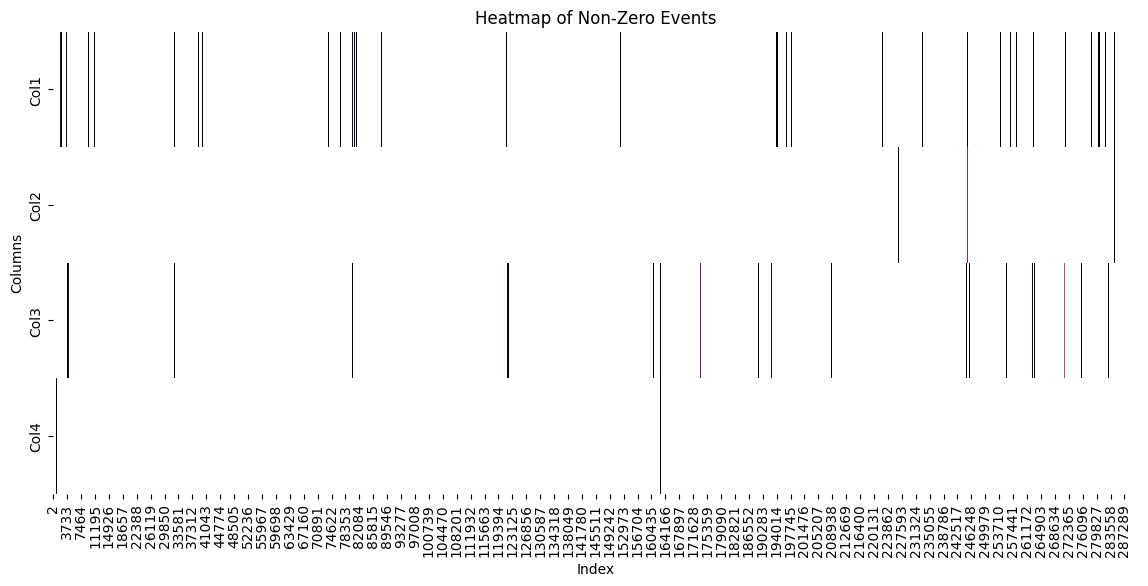

In [8]:
import numpy as np

sparse_df = df.set_index("Index").T
mask = (sparse_df > 0)  # mark non-zeros

plt.figure(figsize=(14,6))
sns.heatmap(sparse_df, mask=~mask, cmap="magma", cbar=False)
plt.title("Heatmap of Non-Zero Events")
plt.xlabel("Index")
plt.ylabel("Columns")
plt.show()


In [10]:
!pip install datashader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 64.1 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/cudf/utils/gpu_utils.py:75: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


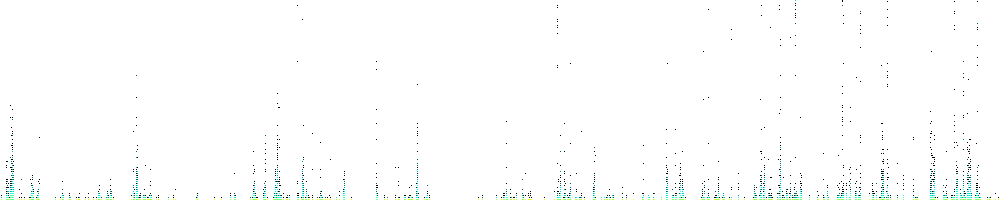

In [11]:
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd

cvs = ds.Canvas(plot_width=1000, plot_height=200)
agg = cvs.points(df, "Index", "Col1")  # example with one column
img = tf.shade(agg, cmap=["black", "cyan", "yellow", "white"])
img.to_pil()

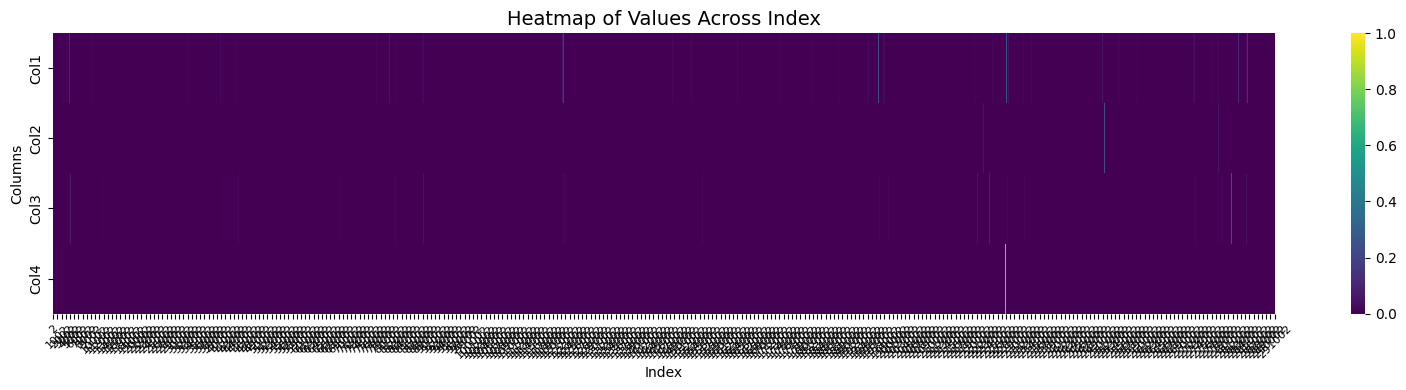

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))  # wide and short
ax = sns.heatmap(df.set_index("Index").T, cmap="viridis", cbar=True)

# Downsample x-axis ticks
N = 1000   # adjust based on dataset length
ax.set_xticks(range(0, len(df), N))
ax.set_xticklabels(df["Index"].iloc[::N], rotation=45, fontsize=8)

plt.title("Heatmap of Values Across Index", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()


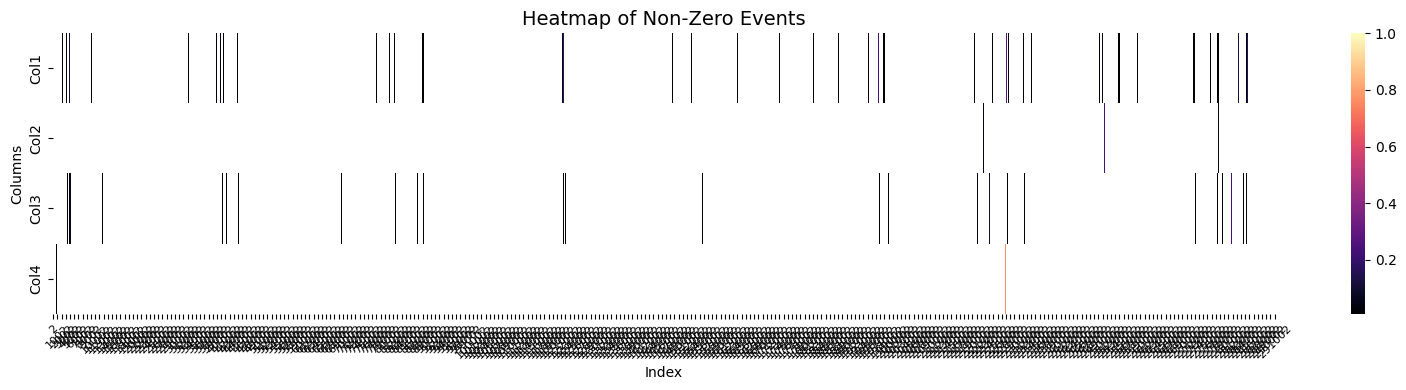

In [14]:
plt.figure(figsize=(16, 4))
sparse_df = df.set_index("Index").T
mask = (sparse_df == 0)

ax = sns.heatmap(sparse_df, mask=mask, cmap="magma", cbar=True)

# Downsample x-axis ticks
N = 1000
ax.set_xticks(range(0, len(df), N))
ax.set_xticklabels(df["Index"].iloc[::N], rotation=45, fontsize=8)

plt.title("Heatmap of Non-Zero Events", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()


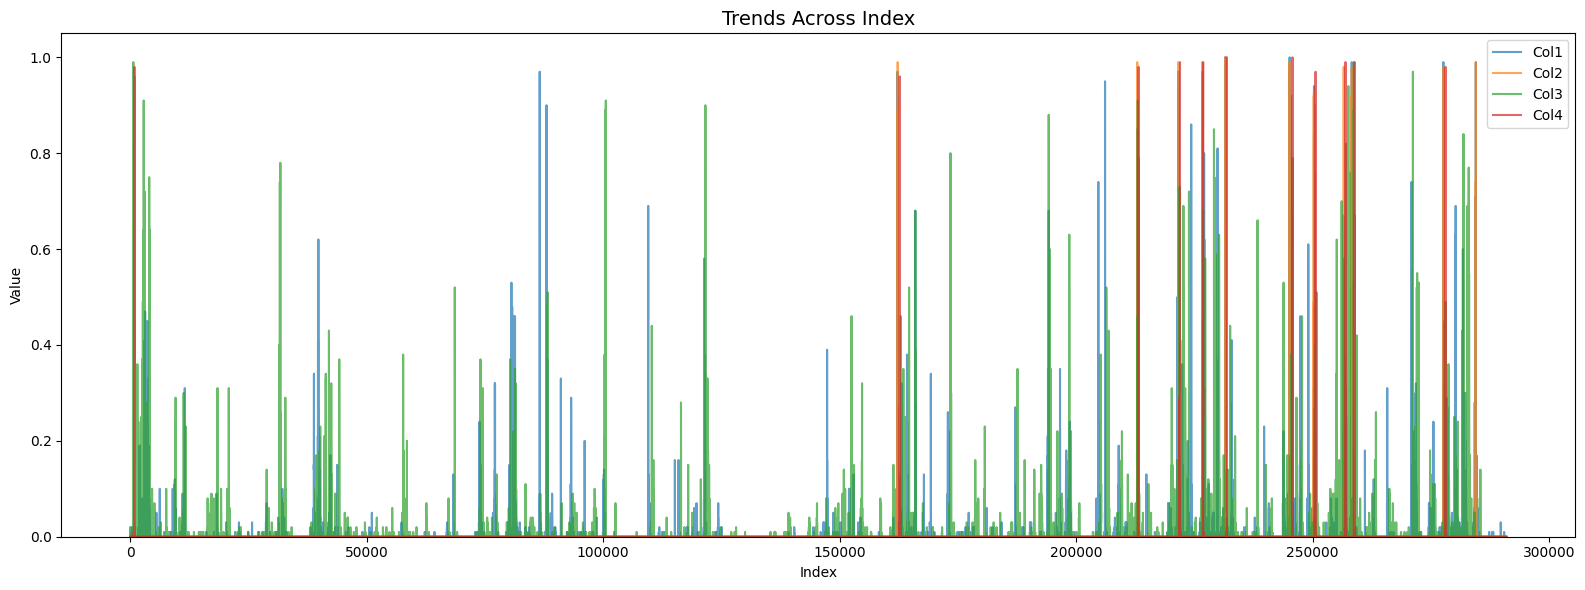

In [15]:
plt.figure(figsize=(16, 6))
for col in df.columns[1:]:
    plt.plot(df["Index"], df[col], label=col, alpha=0.7)

plt.ylim(bottom=0)
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Trends Across Index", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


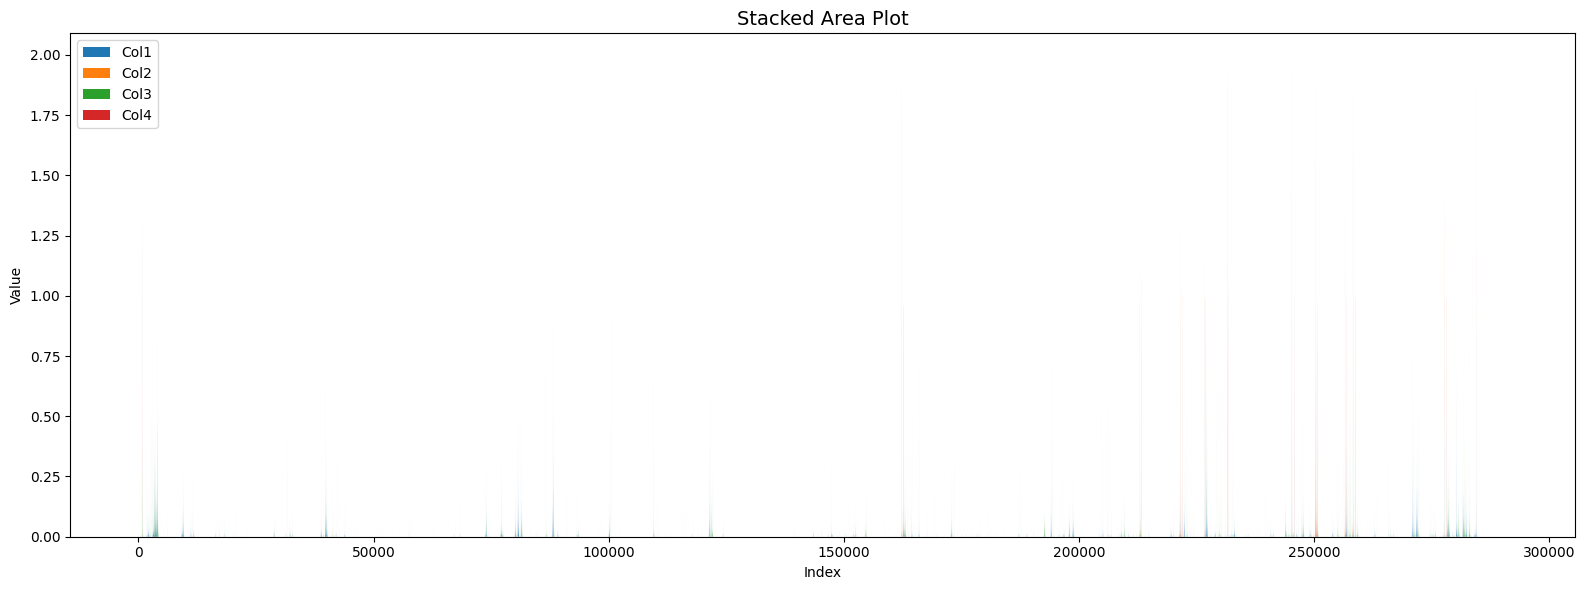

In [21]:
plt.figure(figsize=(16, 6))
plt.stackplot(df["Index"], [df[c] for c in df.columns[1:]],
              labels=df.columns[1:], alpha=1)

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Stacked Area Plot", fontsize=14)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


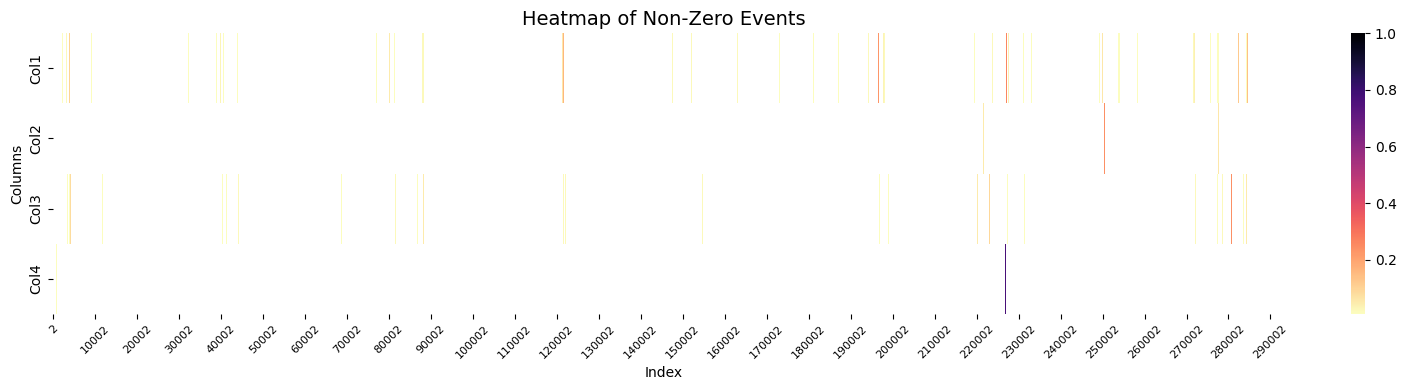

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
sparse_df = df.set_index("Index").T
mask = (sparse_df == 0)

 # ~20 ticks max
ax = sns.heatmap(sparse_df, mask=mask, cmap="magma_r", cbar=True)

# Show fewer x-axis ticks
N = 10000   # change this depending on dataset length
ax.set_xticks(range(0, len(df), N))
ax.set_xticklabels(df["Index"].iloc[::N], rotation=45, fontsize=8)

plt.title("Heatmap of Non-Zero Events", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()


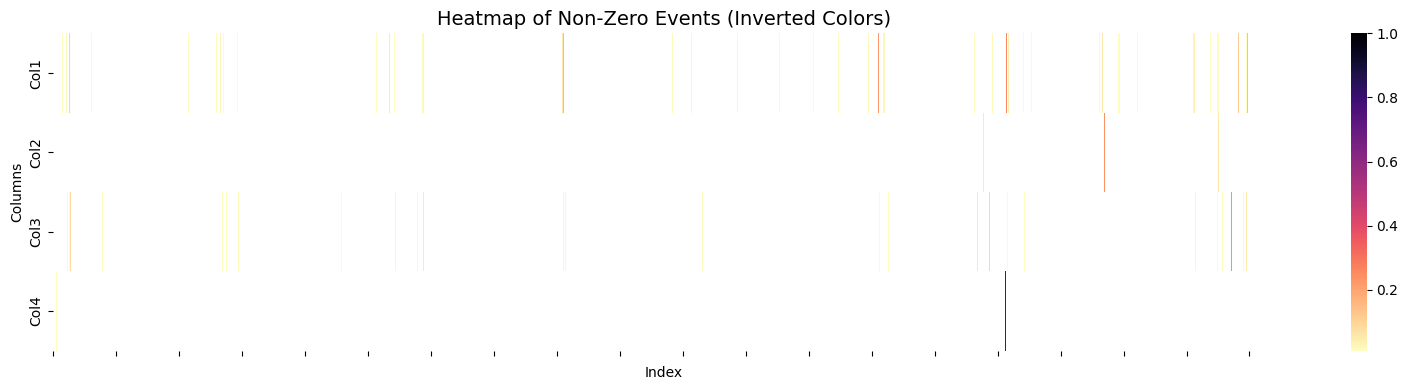

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(16, 4))
sparse_df = df.set_index("Index").T
mask = (sparse_df == 0)

ax = sns.heatmap(sparse_df, mask=mask, cmap="magma_r", cbar=True)

# Limit number of x-axis ticks automatically
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))

plt.title("Heatmap of Non-Zero Events (Inverted Colors)", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()


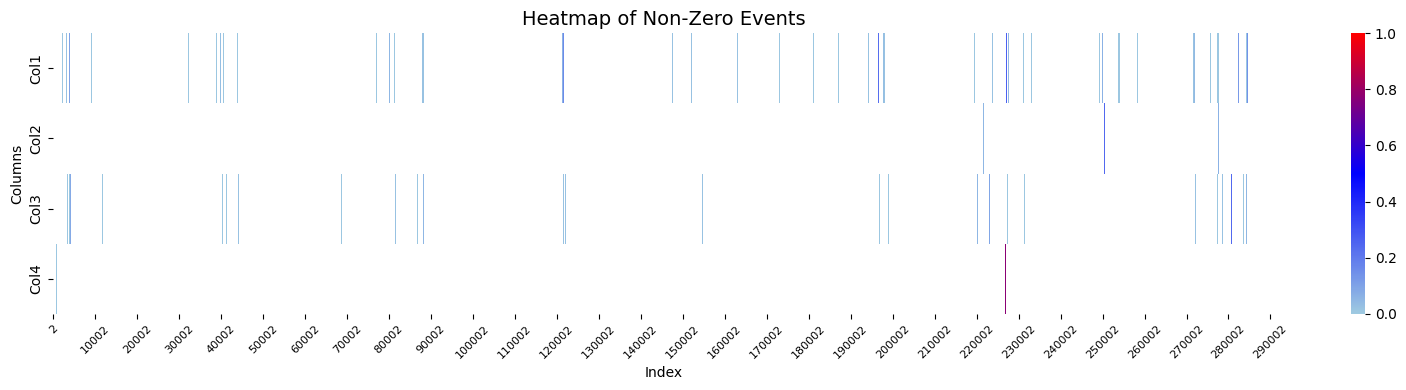

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(16, 4))
sparse_df = df.set_index("Index").T
mask = (sparse_df == 0)


# White → light blue → dark blue
colors = ["#9ecae1", "#0000FF", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom", colors)

ax = sns.heatmap(
    sparse_df, mask=mask,
    cmap=cmap, cbar=True,
    vmin=0, vmax=sparse_df.max().max()
)

# Show fewer x-axis ticks
N = 10000   # change this depending on dataset length
ax.set_xticks(range(0, len(df), N))
ax.set_xticklabels(df["Index"].iloc[::N], rotation=45, fontsize=8)


plt.title("Heatmap of Non-Zero Events", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()
